<a href="https://colab.research.google.com/github/annaha88/ML-DL-study/blob/master/20201110_CNN_%EC%98%88%EC%A0%9C_(keras_pdf2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN 예제 (keras pdf2) p.40~

- MNIST 손글씨 예제 - 이미 데이터 전처리가 되어 있는 Clean data이다.

-  가로 28 * 세로 28 = 784 개의 속성(features)을 이용해 0~9 까지 10개클래스 중 하나의 숫자를 맞히는 문제가 된다.

In [1]:
from keras.datasets import mnist

In [3]:
from keras.utils import np_utils

In [4]:
import numpy as np
import pandas as pd

In [6]:
import sys
import tensorflow as tf

In [8]:
# seed 값 설정
seed = 0
np.random.seed(seed)

In [22]:
# MNIST 데이터 셋 로드
(X_train, y_class_train), (X_test, y_class_test)= mnist.load_data()

In [23]:
type(X_train), type(y_class_train)

(numpy.ndarray, numpy.ndarray)

In [24]:
# 6만개의 이미지 데이터를, 각 이미지별로 28*28 픽셀로 총 784개의 속성값을 input 으로 하여 받겠다.
X_train.shape, y_class_train.shape, X_test.shape, y_class_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [26]:
# 학습셋& 테스트 셋 이미지 수 확인
X_train.shape[0], X_test.shape[0]

(60000, 10000)

In [31]:
len(X_train)

60000

In [29]:
# 한개의 이미지 데이터 구조 확인
len(X_train[0])
# 가로 28 * 세로 28 = 784 개의 속성(features)을 이용해 0~9 까지 10개클래스 중 하나의 숫자를 맞히는 문제가 된다.

28

- 6만개의 이미지를 학습하고, 1만개의 테스트 데이터로 검증하겠다.

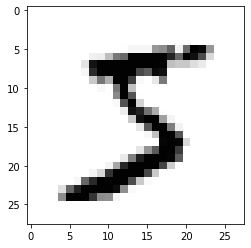

In [30]:
# 그래프로 첫번째 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys' )  # 흑백의 이미지 cmap = 'Greys' 지정
plt.show()

In [32]:
# 코드로 확인
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' %i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [33]:
# 차원 변환 과정

# 3차원(60000, 28, 28)의 ndarray를 2차원(60000, 784)으로 변환하기(이미지 2D 정보를 를 1D로)
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')  # 0~1 사이값으로 데이터 정규화 하기 위해 실수형으로 형변환
X_train = X_train/255  # 최대값인 255로 나누어 데이터 Normalization

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [34]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [40]:
# 레이블 값 확인
print(len(y_class_train))
print(y_class_train[:10])

60000
[5 0 4 1 9 2 1 3 1 4]


In [41]:
# 바이너리화 과정
# 원핫 인코딩(to_categorical(레이블, 레이블의 카테고리 개수) 이용)
y_train = np_utils.to_categorical(y_class_train, 10)
y_test = np_utils.to_categorical(y_class_test, 10)

In [42]:
# 변환된 값 출력해보기
y_train[0]
# 답인 5에 해당하는 인덱스에 맞도록 원핫인코딩되었다.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 딥러닝 기본 프레임 만들기

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [44]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))  # features 784개, hidden layer 512개 뉴런, 출력 10개인 모델
model.add(Dense(10, activation='softmax'))  # softmax는 전 레이블에 대해 총합을 1로 만들어줌, 즉 각 클래스가 답일 확률을 반환함

In [45]:
# 모델 실행환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
# 오차함수 loss= 교차 엔트로피 다중 분류 문제 categorical 사용

In [47]:
import os

In [48]:
# 모델 최적화 설정

# 저장될 디렉토리 지정. 만약 없으면 만들어라.
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델이 저장될 path 지정. epoch 횟수와, 테스트셋 오차값으로 파일명 지정
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [50]:
# 모델의 실행, 학습시작
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback])

Epoch 1/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0455 - accuracy: 0.9871 - val_loss: 0.0709 - val_accuracy: 0.9771
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9903 - val_loss: 0.0638 - val_accuracy: 0.9804
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0267 - accuracy: 0.9934 - val_loss: 0.0659 - val_accuracy: 0.9794
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0210 - accuracy: 0.9947 - val_loss: 0.0599 - val_accuracy: 0.9810
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9967 - val_loss: 0.0618 - val_accuracy: 0.9808
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0128 - accuracy: 0.9974 - val_loss: 0.0587 - val_accuracy: 0.9819
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0092 - accuracy: 0.9982 - val_loss: 0.0598 - val_accuracy: 0.9819
Epoch 

- early stopping에 의해 16회에 종료되었다.
- 이미 클리닝 되어 있는 데이터셋이어서 그런지 별거 안해도 꽤 높은 정확도가 나온다 (98%)

In [57]:
# 테스트 정확도 출력
model.evaluate(X_test, y_test)
# [loss, accuracy]출력 

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9805


[0.07109186798334122, 0.9804999828338623]

98.04%의 정확도로 이미 꽤 높다

In [58]:
# 학습 데이터 내부의 테스트 셋의 오차 확인
y_vloss = history.history['val_loss']
y_vloss

[0.07085054367780685,
 0.0637819841504097,
 0.06586546450853348,
 0.05987296253442764,
 0.06179928407073021,
 0.05865631252527237,
 0.05979345738887787,
 0.06170063465833664,
 0.061917584389448166,
 0.06439411640167236,
 0.06546584516763687,
 0.061296623200178146,
 0.0681212916970253,
 0.08498791605234146,
 0.07088097929954529,
 0.07109187543392181]

In [60]:
# 학습데이터 내부의 학습셋의 오차
y_loss = history.history['loss']
y_loss

[0.04552548751235008,
 0.03450155258178711,
 0.02666482701897621,
 0.021031806245446205,
 0.015032338909804821,
 0.012797974981367588,
 0.00918259285390377,
 0.006894802208989859,
 0.0060746693052351475,
 0.004196156281977892,
 0.0032079406082630157,
 0.0025520625058561563,
 0.002523956820368767,
 0.011511952616274357,
 0.010994554497301579,
 0.004084847401827574]

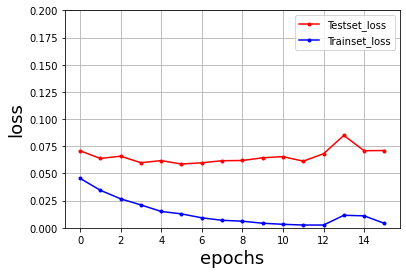

In [70]:
# 그래프로 표현
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='b', label='Trainset_loss')
plt.legend()
plt.ylabel('loss', fontsize=18)
plt.xlabel('epochs', fontsize=18)
plt.grid()
plt.ylim(0, 0.2)
plt.yticks
plt.show()

- 학습 데이터에 비해 test 데이터의 loss 가 높다

## CNN(컨볼루션 신경망) 으로 동일한 문제를 풀어보자

In [72]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D  # 2D : 2차원 평면 이미지 이므로
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [74]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [75]:
# 데이터 로드
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# 흑백 이미지이므로 input shpae의 마지막은 1이 되어야 한다(컬러면 3(RGB)), 4차원으로 차원 변경하기
X_train = X_train.reshape(X_train.shape[0],28, 28,1).astype('float32') /255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
# 레이블 원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [77]:
y_train[0], y_test[0]
# 원핫 인코딩 결과 확인

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [78]:
# 컨볼루션 신경망 설정
model = Sequential()
# 흑백 이미지이므로 input shpae의 마지막은 1이 되어야 한다(컬러면 3(RGB))
# 마스크 개수 32개, 마스크 사이즈 (3,3): 여러개의 마스크를 적용하면 서로 다른 컨볼루션이 여러개 나온다. 즉 여기서는 32개의 컨볼루션이 1차로 반환된다. 
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
# 마스크 개수 64개(필터의 개수)를 적용한 새로운 층 추가
model.add(Conv2D(64, (3,3), activation='relu'))
# 맥스풀링층 추가(특징점 극대화하여 추출)
model.add(MaxPool2D(pool_size=2))   # 추출할 영역 2*2로 지정(2*2내부에서 제일 큰 값만 가져오기) => 컨볼루션 된 데이터는 원본데이터의 절반이 된다.
# 과적합을 방지하기 위해 25%의 노드 꺼주는 dropout 층 추가
model.add(Dropout(0.25))

'''
이제 위에서 처리된 결과로 학습을 시키기 위해 Dense() 함수를 이용해 기본층에 연결해야한다.
 => 위에서는 2D 배열인 채로 다루어야 했지만, 이제는 1차원으로 변환필요 => Flatten
'''
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10개의 클래스로 구분되어 있으므로 출력층은 10개, 각 레이블당 답이 될 확률이 반환된다.

In [79]:
# 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- 컨볼루션 층의 적용

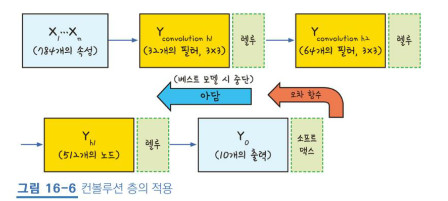

- 맥스 풀링 층 추가

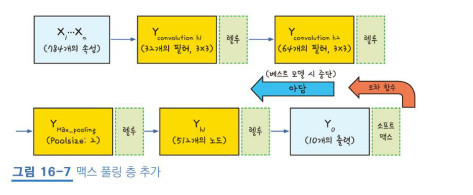

- 드롭아웃과 플래튼 추가

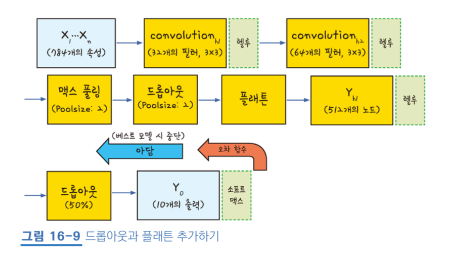

In [80]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [81]:
# 학습 시작
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback])


Epoch 1/30
300/300 [==============================] - 3s 11ms/step - loss: 0.2761 - accuracy: 0.9163 - val_loss: 0.0574 - val_accuracy: 0.9818
Epoch 2/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0894 - accuracy: 0.9739 - val_loss: 0.0423 - val_accuracy: 0.9868
Epoch 3/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0677 - accuracy: 0.9798 - val_loss: 0.0358 - val_accuracy: 0.9877
Epoch 4/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0314 - val_accuracy: 0.9900
Epoch 5/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0287 - val_accuracy: 0.9911
Epoch 6/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0270 - val_accuracy: 0.9910
Epoch 7/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0264 - val_accuracy: 0.9922

In [83]:
# 테스트 정확도 출력
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0280 - accuracy: 0.9920


[0.02799418568611145, 0.9919999837875366]

- 정확도 99% 로 매우 높다

In [84]:
# 학습데이터 내부의 테스트 셋의 오차 확인하기
y_vloss = history.history['val_loss']
y_vloss

[0.05739422142505646,
 0.042342640459537506,
 0.03578146547079086,
 0.03141506016254425,
 0.028712747618556023,
 0.026978284120559692,
 0.02642851509153843,
 0.029401272535324097,
 0.02547430247068405,
 0.026248440146446228,
 0.027779271826148033,
 0.029580391943454742,
 0.027540920302271843,
 0.030378269031643867,
 0.026531314477324486,
 0.03033333458006382,
 0.025825414806604385,
 0.03201230615377426,
 0.027994176372885704]

In [85]:
#  학습데이터 내부의 학습셋의 오차
y_loss = history.history['loss']
y_loss

[0.2761453092098236,
 0.08941490203142166,
 0.06773705035448074,
 0.05350419878959656,
 0.04675968736410141,
 0.04108843952417374,
 0.036709416657686234,
 0.03167949244379997,
 0.02919873222708702,
 0.026466941460967064,
 0.024830808863043785,
 0.02151099592447281,
 0.022200867533683777,
 0.019146425649523735,
 0.019765714183449745,
 0.0163066778331995,
 0.017116598784923553,
 0.014611879363656044,
 0.016894666478037834]

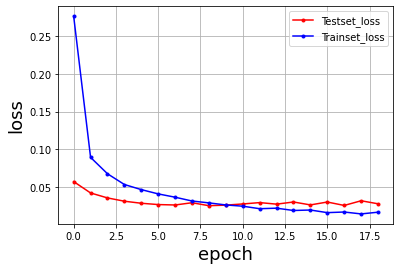

In [86]:
# 위의 오차를 그래프로 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='b', label='Trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.show()

- 테스트 셋에서도 오차가 매우 적다. 10번정도 위치의 베스트 모델이 저장되었을듯 하다.

- 매우 정확하다. 100%를 다 맞히지 못한 이유는 데이터 자체의 문제 때문일수가 있다